In [1]:
# Import your google drive with notebooks
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd 'Colab Notebooks'
%ls

/content/drive/MyDrive/Colab Notebooks
'homework_differentiation (1).ipynb'   homework_modules.ipynb
'homework_differentiation (2).ipynb'  'homework_test_modules (1).ipynb'
'homework_differentiation (3).ipynb'  'homework_test_modules (2).ipynb'
'homework_differentiation (4).ipynb'   homework_test_modules.ipynb
'homework_differentiation (5).ipynb'   module01_basics.ipynb
 homework_differentiation.ipynb       'module02_gradient_descent (1).ipynb'
'[homework]knn (1).ipynb'             'module02_gradient_descent (2).ipynb'
'[homework]knn.ipynb'                  module02_gradient_descent.ipynb
 homework_main-advanced.ipynb         'module03_sin_prediction (1).ipynb'
'homework_main-basic (1).ipynb'        module03_sin_prediction.ipynb
'homework_main-basic (2).ipynb'        module03_wine_prediction.ipynb
'homework_main-basic (3).ipynb'       'module04_mnist_fc (1).ipynb'
'homework_main-basic (4).ipynb'       'module04_mnist_fc (2).ipynb'
'homework_main-basic (5).ipynb'        module04_mnist_f

In [5]:
%run homework_modules.ipynb


In [ ]:
%matplotlib inline
!pip install mnist
!pip install scikit-learn
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython import display
import sklearn

In [7]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
import mnist
images = mnist.train_images()
labels = mnist.train_labels()
pca = PCA(n_components=2)
new_features = pca.fit_transform([i.reshape(-1) for i in images])
X_train, X_val, y_train, y_val = train_test_split(images, labels)

In [36]:
net = Sequential()
net.add(BatchNormalization())
net.add(Linear(28*28, 100))
#net.add(SoftPlus())
net.add(ReLU())
net.add(BatchNormalization())
net.add(Linear(100, 10))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

BatchNormalization
Linear 784 -> 100
ReLU
BatchNormalization
Linear 100 -> 10
LogSoftMax



In [37]:
# Optimizer params
optimizer_config = {'learning_rate' : 1e-2, 'beta1': 0.9, 'beta2':0.999, 'epsilon':1e-8}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 600

In [38]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]

    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)

        batch_idx = indices[start:end]

        yield X[batch_idx], Y[batch_idx]

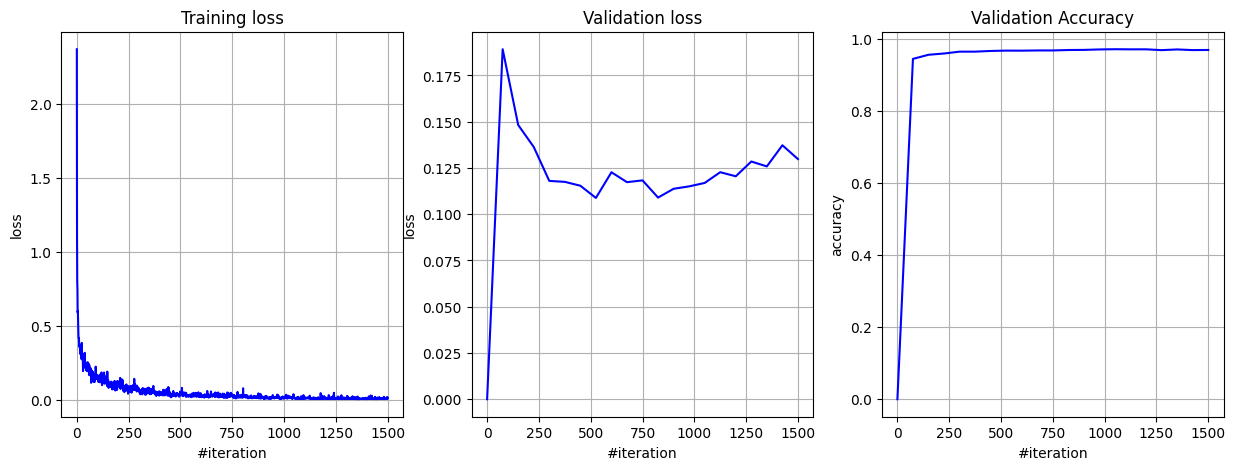

Current loss: 0.129804


In [39]:
import pdb
%pdb on
train_loss_history = []
val_loss_history = [0,]
val_acc_history = [0,]
steps = [0,]



for i in range(n_epoch):
    steps.append(steps[-1])
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        #pdb.set_trace()
        net.zeroGradParameters()
        x_batch = x_batch.reshape(-1, 28*28)

        # Forward
        predictions = net.forward(x_batch)
        target = np.zeros((batch_size, 10), np.float32)
        target[np.arange(batch_size), y_batch] = 1  # one-hot encoding
        loss = criterion.forward(predictions, target)

        # Backward
        dp = criterion.backward(predictions, target)
        net.backward(x_batch, dp)

        # Update weights
        adam_optimizer(net.getParameters(),
                net.getGradParameters(),
                optimizer_config,
                optimizer_state)

        train_loss_history.append(loss)
        steps[-1] += 1

    sum_loss = 0
    sum_acc = 0
    count_val_steps = 0
    for x_batch, y_batch in get_batches((X_val, y_val), batch_size):
        x_batch = x_batch.reshape(-1, 28*28)

        predictions = net.forward(x_batch)
        target = np.zeros((batch_size, 10), np.float32)
        target[np.arange(batch_size), y_batch] = 1  # one-hot encoding

        loss = criterion.forward(predictions, target)
        sum_loss += loss
        sum_acc += accuracy_score(y_batch, np.argmax(predictions, axis=1))
        count_val_steps += 1

    val_loss_history.append(sum_loss / count_val_steps)
    val_acc_history.append(sum_acc / count_val_steps)

    # Visualize
    display.clear_output(wait=True)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].set_title("Training loss")
    ax[0].set_xlabel("#iteration")
    ax[0].set_ylabel("loss")
    ax[0].plot(train_loss_history, 'b')
    ax[0].grid()

    ax[1].set_title("Validation loss")
    ax[1].set_xlabel("#iteration")
    ax[1].set_ylabel("loss")
    ax[1].plot(steps, val_loss_history, 'b')
    ax[1].grid()

    ax[2].set_title("Validation Accuracy")
    ax[2].set_xlabel("#iteration")
    ax[2].set_ylabel("accuracy")
    ax[2].plot(steps, val_acc_history, 'b')
    ax[2].grid()

    plt.show()

    print('Current loss: %f' % (sum_loss / count_val_steps))

